In [ ]:
!pip install networkx

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices  # Number of vertices
        self.graph = []    # List to store graph edges

    # Function to add an edge to the graph
    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    # Function to print the solution
    def print_solution(self, dist):
        print("Vertex Distance from Source")
        for i in range(self.V):
            print(f"{i}\t\t{dist[i]}")

    # Bellman-Ford algorithm
    def bellman_ford(self, src):
        # Initialize distances from src to all other vertices as INFINITE
        dist = [float("Inf")] * self.V
        dist[src] = 0

        # Relax all edges |V| - 1 times
        for _ in range(self.V - 1):
            for u, v, w in self.graph:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w

        # Check for negative-weight cycles
        for u, v, w in self.graph:
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                print("Graph contains negative weight cycle")
                self.visualize_graph(dist, has_negative_cycle=True)
                return

        # Print the distance array
        self.print_solution(dist)
        self.visualize_graph(dist)

    # Function to visualize the graph
    def visualize_graph(self, dist, has_negative_cycle=False):
        G = nx.DiGraph()
        for u, v, w in self.graph:
            G.add_edge(u, v, weight=w)

        pos = nx.spring_layout(G)
        edge_labels = nx.get_edge_attributes(G, 'weight')
        node_labels = {i: f'{i}\n{dist[i] if dist[i] != float("Inf") else "Inf"}' for i in range(self.V)}

        nx.draw(G, pos, with_labels=True, labels=node_labels, node_color='lightblue', node_size=2000, font_size=10, font_weight='bold')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

        if has_negative_cycle:
            plt.title('Graph with Negative Weight Cycle Detected')
        else:
            plt.title('Graph Visualization with Shortest Path Distances')

        plt.show()

Graph contains negative weight cycle


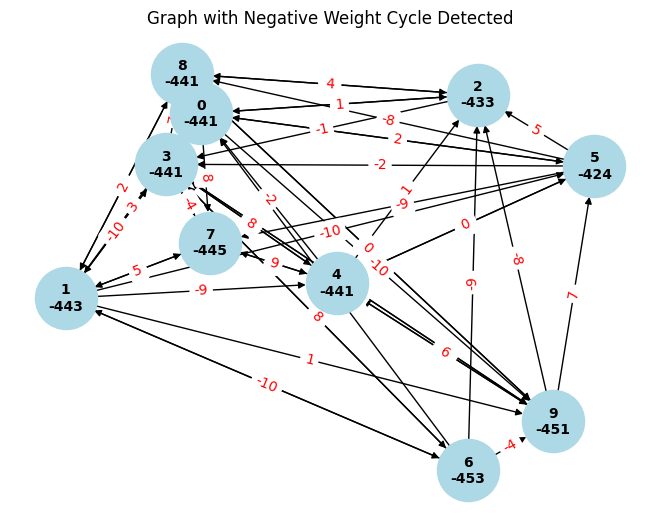

In [3]:
# Create a graph and test the algorithm
if __name__ == "__main__":
    n = 10  # Number of vertices
    g = Graph(n)

    # Generate random edges
    num_edges = random.randint(n, n * (n - 1))  # Random number of edges
    for _ in range(num_edges):
        u = random.randint(0, n - 1)
        v = random.randint(0, n - 1)
        while u == v:  # Ensure no self-loops
            v = random.randint(0, n - 1)
        w = random.randint(-10, 10)  # Random weight between -10 and 10
        g.add_edge(u, v, w)

    # Print the solution
    g.bellman_ford(0)